In [1]:
import logging
import pickle
import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    TimeSeriesSplit,
    GridSearchCV
)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import(
    plot_acf,
    plot_pacf
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [3]:
# Cargar el dataset HISTORY desde el archivo CSV
df = pd.read_csv('../history/HISTORY.csv')

In [4]:
# Convertir la columna Date a formato datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

In [5]:
# Dividir el dataset en entrenamiento y prueba
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [6]:
# Entrenar el modelo ARIMA
model = ARIMA(train_data['Calls'], order=(5,1,0))
model_fit = model.fit()

/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
# Definir el inicio y fin de la predicción
inicio_prediccion = test_data.index[0]
fin_prediccion = inicio_prediccion + pd.DateOffset(months=6)

In [8]:
# Realizar la predicción utilizando ARIMA
y_hat = model_fit.predict(start=inicio_prediccion, end=fin_prediccion)

In [9]:
y_hat

2024-08-01    83905.725875
2024-09-01    79187.962933
2024-10-01    73018.954455
2024-11-01    75233.851053
2024-12-01    73794.687669
2025-01-01    74363.545183
2025-02-01    76021.868076
Freq: MS, Name: predicted_mean, dtype: float64

In [10]:
# Calcular métricas de efectividad del modelo
mse = mean_squared_error(test_data['Calls'][:len(y_hat)], y_hat)
mae = mean_absolute_error(test_data['Calls'][:len(y_hat)], y_hat)

In [11]:
# Mostrar las métricas de efectividad del modelo
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 168389264.66775042
Mean Absolute Error (MAE): 9876.033511974589


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

ARIMA(0, 0, 0) MSE=561267592.3678112
ARIMA(0, 0, 1) MSE=560276727.9702108
ARIMA(0, 0, 2) MSE=548448974.1501951
ARIMA(0, 0, 3) MSE=538875008.5091596


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: U

ARIMA(0, 0, 4) MSE=576763066.9786546
ARIMA(0, 0, 5) MSE=641151441.7282267
ARIMA(0, 1, 0) MSE=271756918.5
ARIMA(0, 1, 1) MSE=248911184.38072896
ARIMA(0, 1, 2) MSE=214468269.3262647
ARIMA(0, 1, 3) MSE=127916766.50775176


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

ARIMA(0, 1, 4) MSE=171314808.84238702
ARIMA(0, 1, 5) MSE=184817452.18792978
ARIMA(1, 0, 0) MSE=545442955.1410682
ARIMA(1, 0, 1) MSE=542441383.5338534
ARIMA(1, 0, 2) MSE=549841076.7662139


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

ARIMA(1, 0, 3) MSE=546181231.935821
ARIMA(1, 0, 4) MSE=618842551.5292428


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:4

ARIMA(1, 0, 5) MSE=611924061.7931507
ARIMA(1, 1, 0) MSE=240363471.82223263
ARIMA(1, 1, 1) MSE=196110118.825631
ARIMA(1, 1, 2) MSE=160227990.6156439
ARIMA(1, 1, 3) MSE=142815631.9780247
ARIMA(1, 1, 4) MSE=131651357.15983033


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: Conv

ARIMA(1, 1, 5) MSE=165279072.973193
ARIMA(2, 0, 0) MSE=545056467.5878336
ARIMA(2, 0, 1) MSE=544312823.6705548
ARIMA(2, 0, 2) MSE=542267429.5483774


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

ARIMA(2, 0, 3) MSE=697571569.2322469
ARIMA(2, 0, 4) MSE=721768548.7688502


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: U

ARIMA(2, 0, 5) MSE=680338189.6110109
ARIMA(2, 1, 0) MSE=194095274.0040657
ARIMA(2, 1, 1) MSE=194173084.9383381
ARIMA(2, 1, 2) MSE=210948848.815359


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: Conv

ARIMA(2, 1, 3) MSE=177263139.83887035
ARIMA(2, 1, 4) MSE=76049502.83385397


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: Conv

ARIMA(2, 1, 5) MSE=146496348.90459684
ARIMA(3, 0, 0) MSE=547608633.687635
ARIMA(3, 0, 1) MSE=672303115.7899294
ARIMA(3, 0, 2) MSE=572322189.8447212


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

ARIMA(3, 0, 3) MSE=694505138.5284855


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: Conv

ARIMA(3, 0, 4) MSE=717234648.3011359


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: Conv

ARIMA(3, 0, 5) MSE=711955349.7927222
ARIMA(3, 1, 0) MSE=197802996.48029298
ARIMA(3, 1, 1) MSE=189709661.51180413
ARIMA(3, 1, 2) MSE=204824116.69057092
ARIMA(3, 1, 3) MSE=198166330.62926286


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/st

ARIMA(3, 1, 4) MSE=95626547.07117286
ARIMA(3, 1, 5) MSE=200543538.02180776
ARIMA(4, 0, 0) MSE=543639175.5581762
ARIMA(4, 0, 1) MSE=540179694.7759683
ARIMA(4, 0, 2) MSE=584661888.5733998


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

ARIMA(4, 0, 3) MSE=700913094.6563118


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: U

ARIMA(4, 0, 4) MSE=687117272.528735


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: Value

ARIMA(4, 0, 5) MSE=829185777.9888566
ARIMA(4, 1, 0) MSE=168059880.24905917
ARIMA(4, 1, 1) MSE=160119825.02095795


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: U

ARIMA(4, 1, 2) MSE=179598085.8406916
ARIMA(4, 1, 3) MSE=120960164.27652735


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: Conv

ARIMA(4, 1, 4) MSE=326932576.8605754


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: Value

ARIMA(4, 1, 5) MSE=162536921.08984637
ARIMA(5, 0, 0) MSE=539561596.1431806


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: Value

ARIMA(5, 0, 1) MSE=536552313.5445378
ARIMA(5, 0, 2) MSE=577467606.4868321


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: U

ARIMA(5, 0, 3) MSE=588148807.0740476


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: U

ARIMA(5, 0, 4) MSE=706880743.0430171


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: Value

ARIMA(5, 0, 5) MSE=731389723.6752356
ARIMA(5, 1, 0) MSE=151801407.16763002
ARIMA(5, 1, 1) MSE=159225189.01299968
ARIMA(5, 1, 2) MSE=241699841.05179375


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/st

ARIMA(5, 1, 3) MSE=227613352.0477058


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: Conv

ARIMA(5, 1, 4) MSE=54776905.67299408


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: U

ARIMA(5, 1, 5) MSE=182761396.7666454
Best ARIMA(5, 1, 4) MSE=54776905.67299408


/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE): 52155271.69914193
Mean Absolute Error (MAE): 6154.94107975449


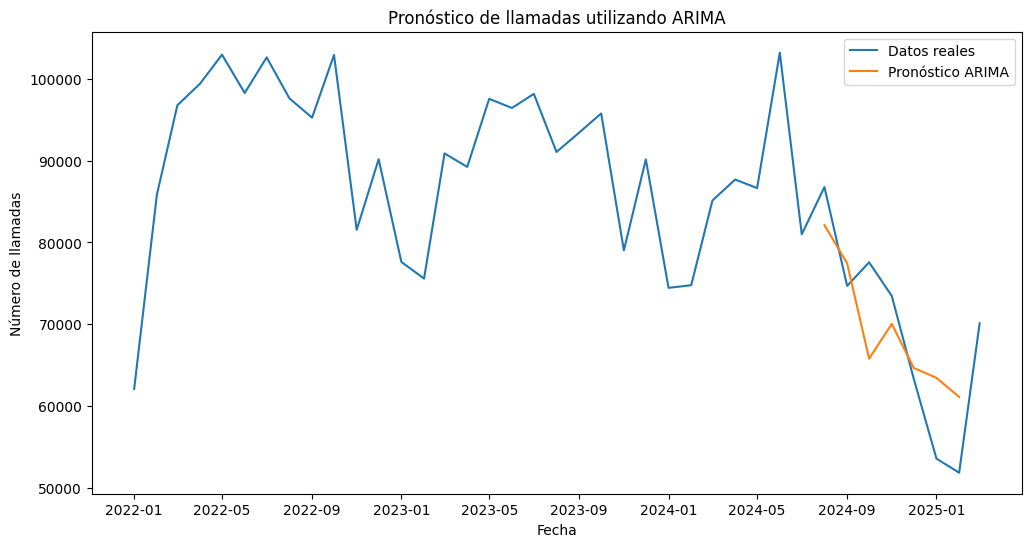

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Cargar el dataset HISTORY desde el archivo CSV
df = pd.read_csv('../history/HISTORY.csv')

# Convertir la columna Date a formato datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Dividir el dataset en entrenamiento y prueba
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Definir una función para evaluar el modelo ARIMA
def evaluate_arima_model(train_data, test_data, arima_order):
    model = ARIMA(train_data['Calls'], order=arima_order)
    model_fit = model.fit()
    y_hat = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
    mse = mean_squared_error(test_data['Calls'], y_hat)
    return mse

# Definir los rangos de los hiperparámetros
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

# Realizar la búsqueda de cuadrícula
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mse = evaluate_arima_model(train_data, test_data, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print(f'ARIMA{order} MSE={mse}')
            except:
                continue

print(f'Best ARIMA{best_cfg} MSE={best_score}')

# Entrenar el mejor modelo ARIMA
best_model = ARIMA(train_data['Calls'], order=best_cfg)
best_model_fit = best_model.fit()

# Realizar la predicción utilizando el mejor modelo ARIMA
inicio_prediccion = test_data.index[0]
fin_prediccion = inicio_prediccion + pd.DateOffset(months=6)
y_hat = best_model_fit.predict(start=inicio_prediccion, end=fin_prediccion)

# Calcular métricas de efectividad del modelo
mse = mean_squared_error(test_data['Calls'][:len(y_hat)], y_hat)
mae = mean_absolute_error(test_data['Calls'][:len(y_hat)], y_hat)

# Mostrar las métricas de efectividad del modelo
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Calls'], label='Datos reales')
plt.plot(y_hat.index, y_hat, label='Pronóstico ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.title('Pronóstico de llamadas utilizando ARIMA')
plt.legend()
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Cargar el dataset
df = pd.read_csv('../history/HISTORY.csv')
df['Fechas'] = pd.to_datetime(df['Fechas'], format='%m/%d/%Y')
df.set_index('Fechas', inplace=True)

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Llamadas'].values.reshape(-1, 1))

# Preparar los datos para LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir los datos en entrenamiento y prueba
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Realizar predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la escala de los datos
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calcular métricas de efectividad del modelo
train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f'Train Mean Squared Error (MSE): {train_mse}')
print(f'Test Mean Squared Error (MSE): {test_mse}')

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Llamadas'], label='Datos reales')
plt.plot(df.index[:train_size], train_predict, label='Predicción de entrenamiento')
plt.plot(df.index[train_size:], test_predict, label='Predicción de prueba')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.title('Pronóstico de llamadas utilizando LSTM')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'